In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [2]:
# Load data from csv file
data_companies = pd.read_csv('ticker-overview.csv')
data_companies = data_companies.drop('Unnamed: 0', axis = 1)

In [3]:
data_companies['industryEn'].value_counts()

Construction & Materials       335
Industrial Goods & Services    265
Food & Beverage                150
Utilities                      145
Real Estate                    125
Basic Resources                110
Personal & Household Goods      77
Chemicals                       73
Health Care                     59
Financial Services              55
Travel & Leisure                50
Media                           41
Retail                          32
Technology                      30
Banks                           27
Automobiles & Parts             15
Insurance                       12
Oil & Gas                       12
Telecommunications               8
Name: industryEn, dtype: int64

In [4]:
# Only pick stickers from HOSE and HNX 
df = pd.read_csv('list-company-by-sector/Banks.csv')
construction_df = df.drop(df[(df['exchange'] == 'UPCOM') | (df['noShareholders'] == 0.0)].index)
construction_df

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,...,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker,status,code,message,traceId
1,HOSE,ACB,289.0,8355.0,Ngân hàng,Banks,1993.0,11008.0,44011.0,0.300,...,-0.012,0.244,3377.4,3377.4,NH,ACB,NaN,NaN,NaN,NaN
2,HOSE,BIDV,289.0,8355.0,Ngân hàng,Banks,1993.0,25416.0,36773.0,0.173,...,0.002,0.347,5058.5,5058.5,NH,BID,NaN,NaN,NaN,NaN
6,HOSE,HDBank,289.0,8355.0,Ngân hàng,Banks,1992.0,13992.0,6015.0,0.190,...,0.097,0.136,2515.3,2530.3,NH,HDB,NaN,NaN,NaN,NaN
8,HOSE,LienVietPostBank,289.0,8355.0,Ngân hàng,Banks,2008.0,8105.0,59906.0,0.049,...,0.073,0.180,1729.1,1729.1,NH,LPB,NaN,NaN,NaN,NaN
9,HOSE,MBBank,289.0,8355.0,Ngân hàng,Banks,1994.0,15910.0,126621.0,0.232,...,0.015,-0.043,4534.0,4534.0,NH,MBB,NaN,NaN,NaN,NaN
10,HOSE,MSB Bank,289.0,8355.0,Ngân hàng,Banks,1991.0,5190.0,36939.0,0.300,...,0.008,-0.069,2000.0,2000.0,NH,MSB,NaN,NaN,NaN,NaN
12,HNX,Ngân hàng Bắc Á,289.0,8355.0,Ngân hàng,Banks,2011.0,2042.0,1678.0,0.000,...,-0.064,-0.042,833.4,813.4,NH,BAB,NaN,NaN,NaN,NaN
13,HNX,Ngân hàng Quốc Dân,289.0,8355.0,Ngân hàng,Banks,1995.0,2000.0,1440.0,0.088,...,-0.168,-0.287,556.8,560.2,NH,NVB,NaN,NaN,NaN,NaN
16,HOSE,SeABank,289.0,8355.0,Ngân hàng,Banks,2011.0,5320.0,3732.0,0.002,...,-0.044,0.272,2040.3,2040.3,NH,SSB,NaN,NaN,NaN,NaN
18,HOSE,SHB,289.0,8355.0,Ngân hàng,Banks,2006.0,7546.0,63268.0,0.068,...,0.056,-0.146,3066.9,3067.4,NH,SHB,NaN,NaN,NaN,NaN


In [5]:
construction_df.columns

Index(['exchange', 'shortName', 'industryID', 'industryIDv2', 'industry',
       'industryEn', 'establishedYear', 'noEmployees', 'noShareholders',
       'foreignPercent', 'website', 'stockRating', 'deltaInWeek',
       'deltaInMonth', 'deltaInYear', 'outstandingShare', 'issueShare',
       'companyType', 'ticker', 'status', 'code', 'message', 'traceId'],
      dtype='object')

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the sector of interest
sector = 'Banks'

# Load the ticket overview dataset
ticker_overview = pd.read_csv('ticker-overview.csv')

# Select the tickers for companies in the sector of interest
tickers = ticker_overview.loc[ticker_overview['industryEn'] == sector, 'ticker'].tolist()

2023-05-21 00:08:54.984708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Load the historical price data for the selected tickers
historical_prices = pd.DataFrame()
for ticker in tickers:
    exchange = ticker_overview.loc[ticker_overview['ticker'] == ticker, 'exchange'].iloc[0]
    if exchange == 'HOSE':
        path = os.path.join('stock-historical-data', ticker + '-VNINDEX-History.csv')
    elif exchange == 'HNX':
        path = os.path.join('stock-historical-data', ticker + '-' + exchange + 'Index' + '-History.csv') 
    elif exchange == 'UPCOM':
        continue
        # path = os.path.join('stock-historical-data', ticker + '-UpcomIndex-History.csv')

In [8]:
data = pd.read_csv(path, parse_dates=['TradingDate'])
historical_prices = pd.concat([historical_prices, data])
historical_prices = historical_prices.drop('Unnamed: 0', axis = 1)

In [9]:
historical_prices

,Open,High,Low,Close,Volume,TradingDate
0,8928.0,8928.0,7554.0,8928.0,58299310,2017-08-17
1,8699.0,8813.0,8516.0,8516.0,1092840,2017-08-18
2,8195.0,8424.0,8127.0,8207.0,798670,2017-08-21
3,7966.0,8241.0,7966.0,8241.0,2295930,2017-08-22
4,8241.0,8424.0,8184.0,8287.0,520790,2017-08-23
...,...,...,...,...,...,...
1378,17600.0,18000.0,17450.0,17450.0,17000870,2023-02-22
1379,17450.0,17550.0,17100.0,17550.0,12982016,2023-02-23
1380,17550.0,17650.0,17150.0,17150.0,10420131,2023-02-24
1381,17000.0,17150.0,16550.0,17000.0,10313143,2023-02-27


In [10]:
historical_prices.index = historical_prices.pop('TradingDate')

In [11]:
### Split the dataset into time windows to get data samples.

df = historical_prices
X_data = []
y_data = []
dates = []
window_size=30 # Time window for data feature (size of 'number of days').

# Only get the open price (index 2 in the data frame)
for i in range(1, len(df) - window_size - 7):
    first = df.iloc[i, 0]
    data_feature = []
    data_label = []
    
    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, 0])
        
    # Next value is the label (price of the next day) to be predicted
    data_label.append(df.iloc[i + window_size, 0])
    
    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, 1))
    y_data.append(np.array(data_label))
    dates.append(df.iloc[i + window_size, :].name)

In [12]:
### Split the data into training, validation and test set
from helper_functions import data_preprocessing as pp
X_train, y_train, X_val, y_val, X_test, y_test, train_dates, val_dates, test_dates = pp.split_dataset(X_data, y_data, dates, 0.1)

print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (1089, 30, 1)
Shape of validation set:  (121, 30, 1)
Shape of test set:  (135, 30, 1)


In [13]:
# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, 1)
X_val = X_val.reshape(X_val.shape[0], window_size, 1)
X_test = X_test.reshape(X_test.shape[0], window_size, 1)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (1089, 30, 1)
Shape of validation set:  (121, 30, 1)
Shape of test set:  (135, 30, 1)


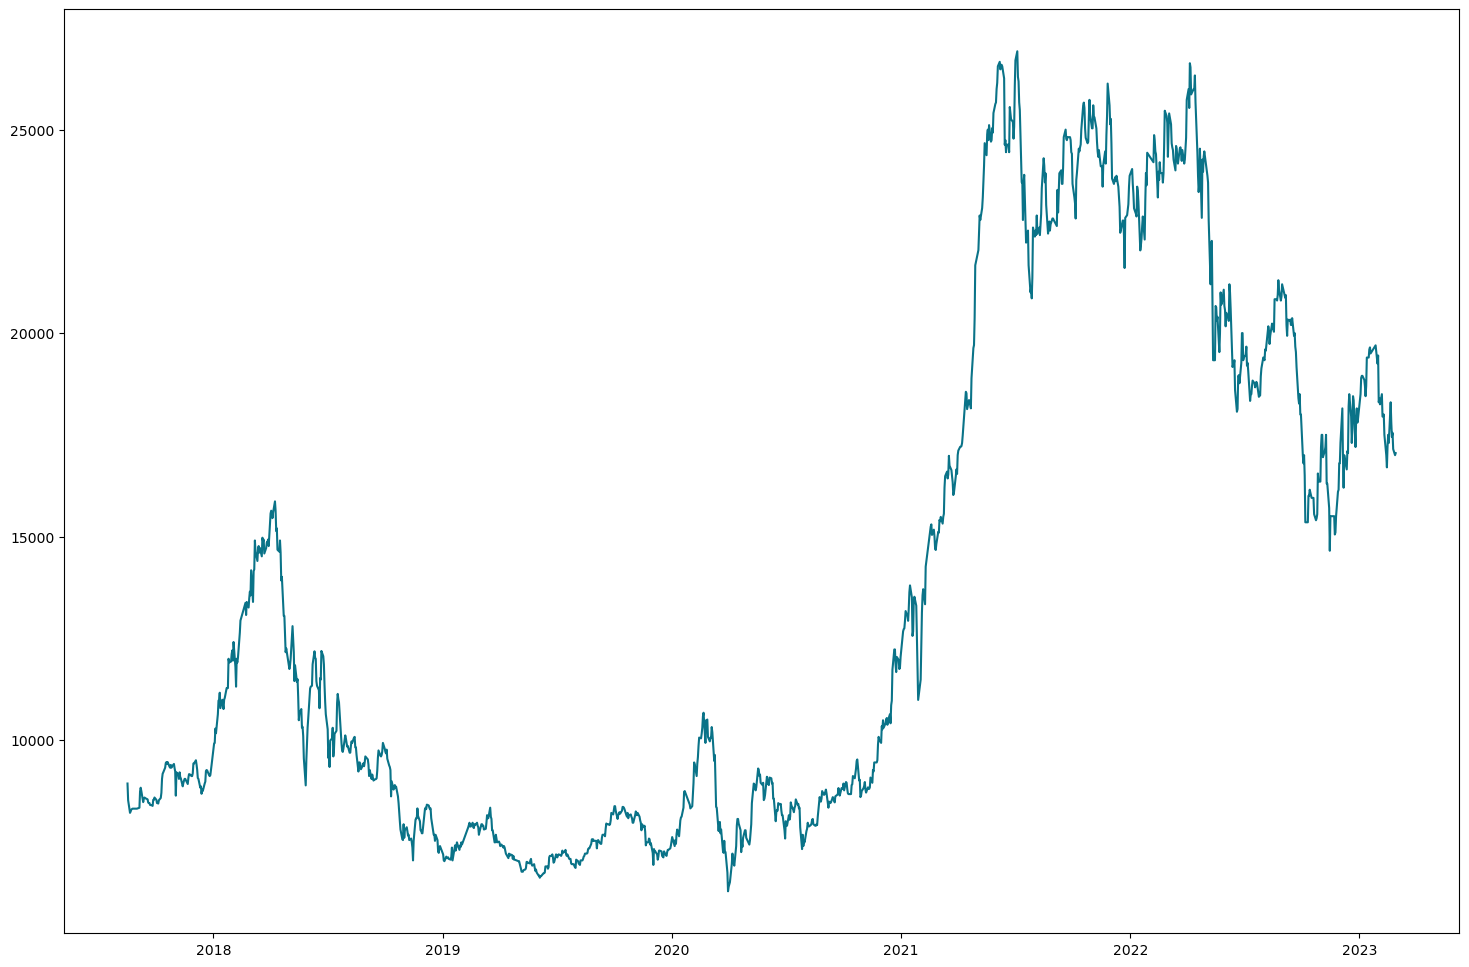

In [14]:
plt.rcParams['figure.figsize'] = (18, 12)

fig, ax = plt.subplots()
ax.plot(historical_prices.index, historical_prices['Close'], '#0A7388')

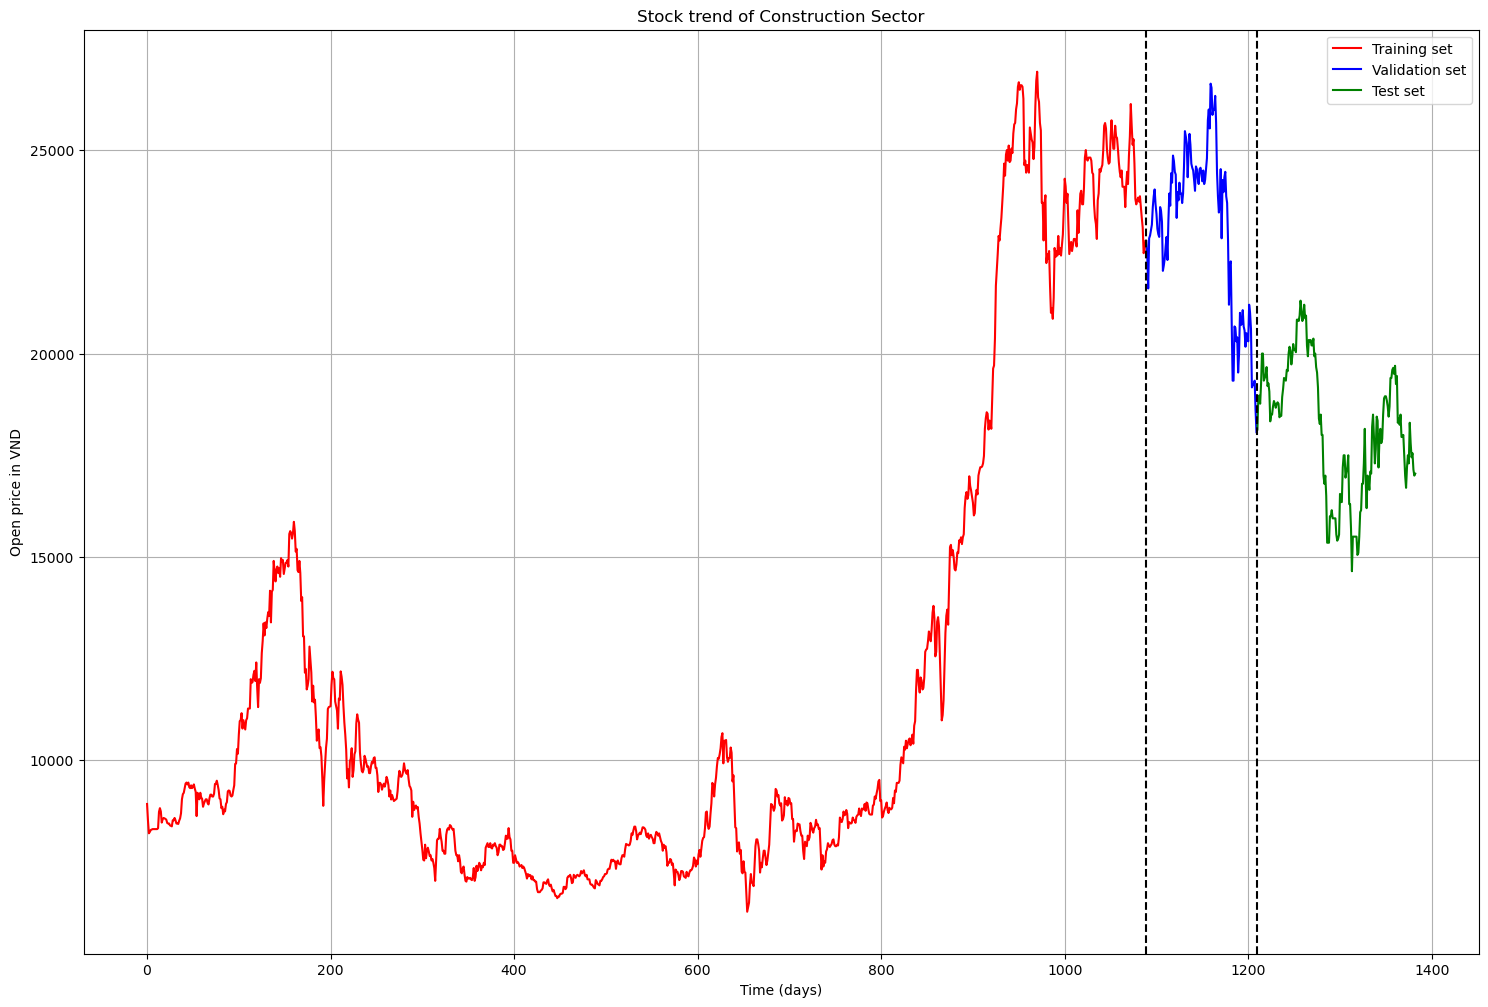

In [15]:
# Visualize the training, validation and test set
df_plot = historical_prices['Close']
df_plot = df_plot.reset_index(drop=False)

# Get lengths of the three subsets
size_train = X_train.shape[0]
size_val = X_val.shape[0]
size_test = X_test.shape[0]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the subset splits
df_plot.iloc[:size_train, 1:2].plot(y=0, color='red', label='Training set', ax=ax)
df_plot.iloc[size_train:size_train + size_val, 1:2].plot(y=0, color='blue', label='Validation set', ax=ax)
df_plot.iloc[size_train + size_val:df_plot.shape[0], 1:2].plot(y=0, color='green', label='Test set', ax=ax)

# Set the title, labels, and vertical lines
ax.set_title("Stock trend of Construction Sector")
ax.set_xlabel('Time (days)')
ax.set_ylabel('Open price in VND')
ax.axvline(x=size_train, color='black', linestyle='--')
ax.axvline(x=size_train + size_val, color='black', linestyle='--')

# Add grid and legend
ax.grid()
ax.legend()

# Show the plot
plt.show()


In [16]:
# MinMax normalization
from helper_functions import data_preprocessing as pp
X_train_norm, y_train_norm = pp.normalize_data(X_train, y_train)
X_val_norm, y_val_norm = pp.normalize_data(X_val, y_val)
X_test_norm, y_test_norm = pp.normalize_data(X_test, y_test)

In [17]:
### Create and train the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(30, 1), activation='relu'))  # LSTM layer with 128 units
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(64, activation='relu'))  # LSTM layer with 64 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units and ReLU activation
model.add(Dense(1))  # Dense output layer with 1 units

# Compile and train the model with Mean Squared Error loss function
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
history = model.fit(X_train_norm, y_train_norm, validation_data=(X_val_norm,y_val_norm), epochs=50, batch_size=128)

Epoch 1/50
9/9 [==============================] - 5s 207ms/step - loss: 0.4358 - mse: 0.4358 - val_loss: 0.1516 - val_mse: 0.1516
Epoch 2/50
9/9 [==============================] - 1s 136ms/step - loss: 0.2147 - mse: 0.2147 - val_loss: 0.1180 - val_mse: 0.1180
Epoch 3/50
9/9 [==============================] - 1s 121ms/step - loss: 0.1389 - mse: 0.1389 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 4/50
9/9 [==============================] - 1s 126ms/step - loss: 0.1169 - mse: 0.1169 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 5/50
9/9 [==============================] - 1s 116ms/step - loss: 0.1021 - mse: 0.1021 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 6/50
9/9 [==============================] - 1s 113ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 7/50
9/9 [==============================] - 1s 122ms/step - loss: 0.0764 - mse: 0.0764 - val_loss: 0.0786 - val_mse: 0.0786
Epoch 8/50
9/9 [==============================] - 1s 120ms/step - loss: 0.0707 - mse: 0.07

In [18]:
### Get prediction on the test data and convert the result back to stock price (i.e., de-normalization)
from sklearn.metrics import mean_squared_error

# Get prediction on the test data
y_pred_norm = model.predict(X_test_norm)
print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

5/5 [==============================] - 0s 14ms/step
MSE on the test set:  0.02603800325646553


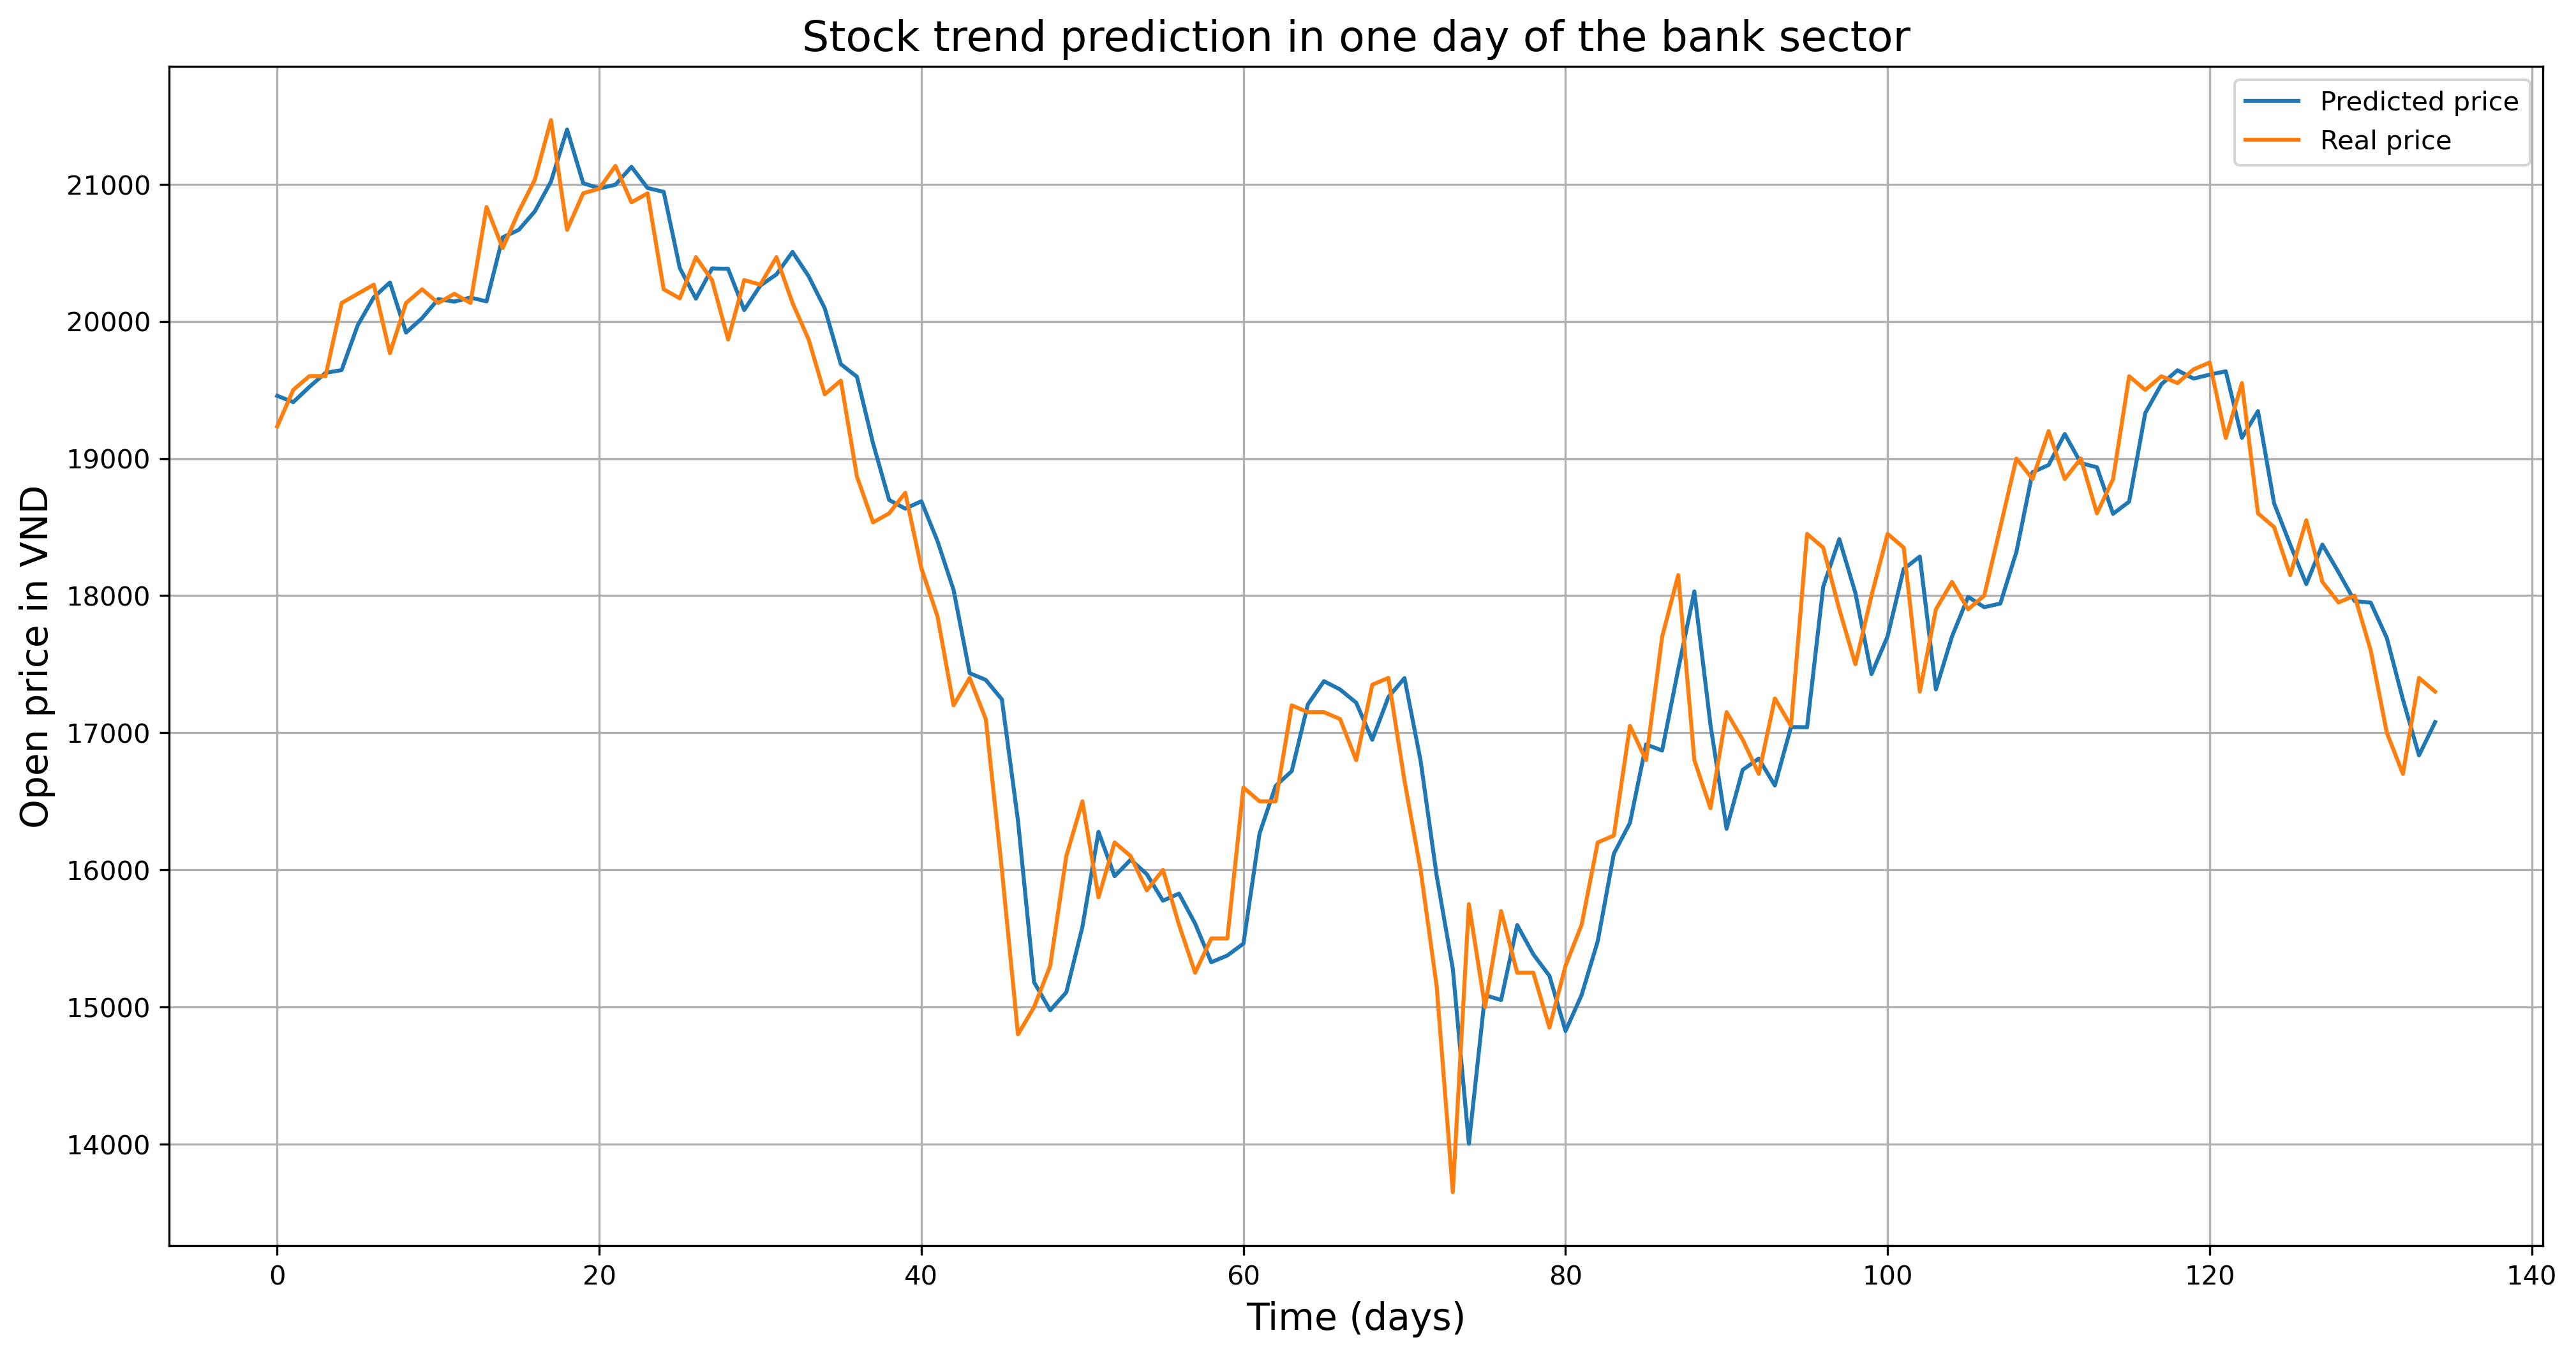

In [19]:
# Convert the result back to stock price (i.e., de-normalization) for visualization purpose
y_pred_denorm = pp.denorm_data(y_pred_norm, X_test)

# Visualize preditec stock price versus real stock price
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(y_pred_denorm, label='Predicted price')
plt.plot(y_test, label='Real price')
plt.title('Stock trend prediction in one day of the bank sector', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Open price in VND', fontsize=14)
plt.grid() # Add grid
plt.legend() # Add legend
plt.show()